In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
rnd.seed(42)

def load_housing_data():
    return pd.read_csv("/content/housing.csv")

housing=load_housing_data()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


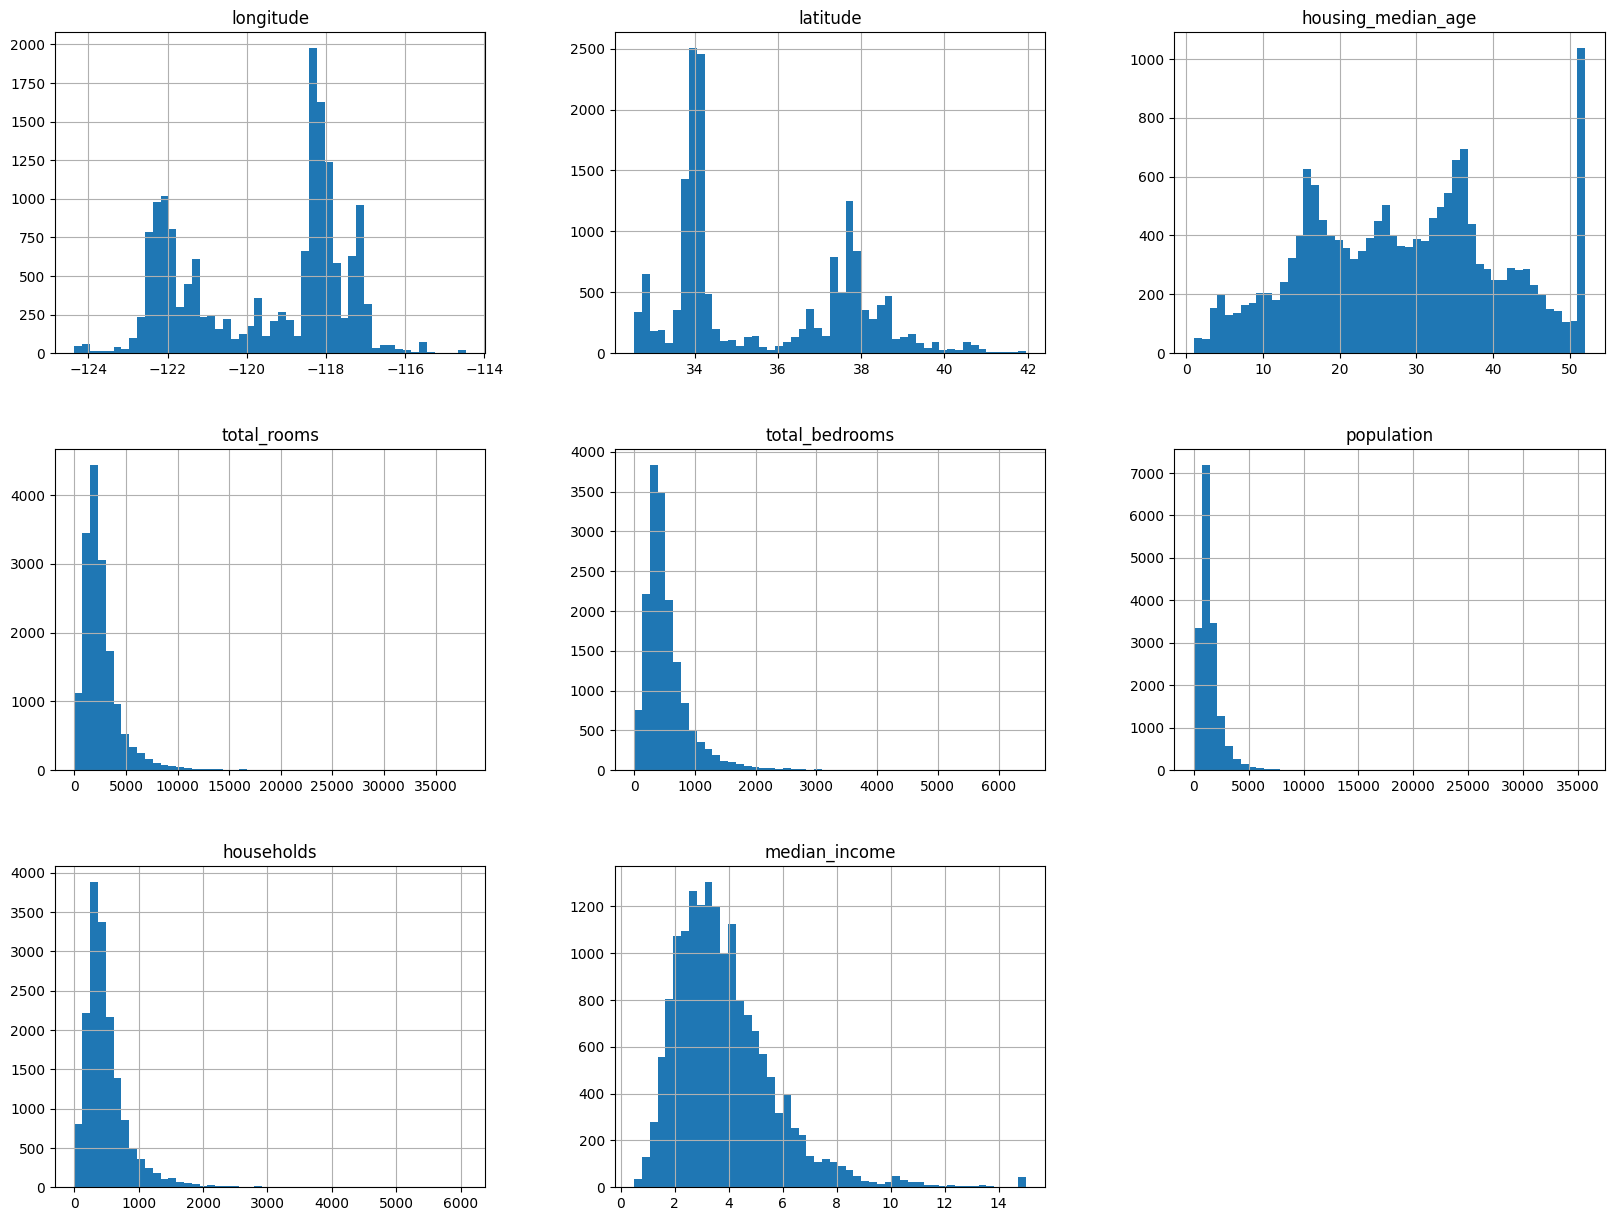

In [48]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# def split_train_test(data, test_ratio):
#     shuffled_indices = rnd.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
# train_set, test_set = split_train_test(housing, 0.2)
# print(len(train_set), len(test_set))

In [ ]:
# same thing can be done with one line in sciket learn

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0)
test_set.head()
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN


<Axes: >

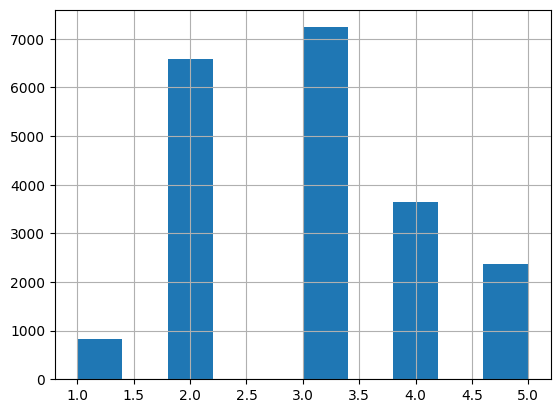

In [ ]:
# we have to focus on certain categories of income
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
list(splitter.split(housing, housing["income_cat"]))[0][0][0:10]

array([19328,  4806, 15645,  2975, 18823,  6697, 16825,  1485,  7312,
        6698])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)



for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


strat_test_set["income_cat"].value_counts() / len(strat_test_set)


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# see accuracy of random and stratified in the slides

#========================================================================

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
strat_train_set.drop("income_cat",axis=1,inplace=True)
strat_test_set.drop("income_cat",axis=1,inplace=True)

In [ ]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,187800.0,<1H OCEAN
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,136600.0,<1H OCEAN
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,400000.0,NEAR BAY
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,106300.0,INLAND
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
12239,-116.93,33.73,13.0,3603.0,573.0,1644.0,515.0,4.0433,132300.0,INLAND
12181,-117.27,33.77,16.0,2876.0,576.0,1859.0,545.0,2.0878,101300.0,<1H OCEAN
18041,-121.98,37.22,46.0,10088.0,1910.0,3728.0,1781.0,5.2321,500001.0,<1H OCEAN
7915,-118.08,33.88,26.0,1507.0,270.0,931.0,275.0,5.1645,244900.0,<1H OCEAN


In [49]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2572,-124.15,40.78,36.0,2112.0,374.0,829.0,368.0,3.3984,90000.0,NEAR OCEAN
19298,-122.80,38.39,26.0,2273.0,474.0,1124.0,420.0,2.9453,166700.0,<1H OCEAN
11018,-117.80,33.77,29.0,5436.0,707.0,2046.0,685.0,8.7496,349500.0,<1H OCEAN
20392,-118.87,34.23,14.0,4242.0,746.0,1858.0,689.0,6.0145,287100.0,<1H OCEAN
19994,-119.37,36.19,24.0,1306.0,266.0,889.0,276.0,2.4922,66100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19645,-120.72,37.54,17.0,729.0,134.0,431.0,121.0,4.2188,131300.0,INLAND
5076,-118.32,33.98,49.0,1993.0,446.0,1052.0,394.0,2.2138,119800.0,<1H OCEAN
5798,-118.24,34.13,37.0,1644.0,395.0,959.0,383.0,3.3636,257700.0,<1H OCEAN
20030,-119.03,36.08,19.0,2471.0,431.0,1040.0,426.0,3.2500,80600.0,INLAND


<Axes: xlabel='longitude', ylabel='latitude'>

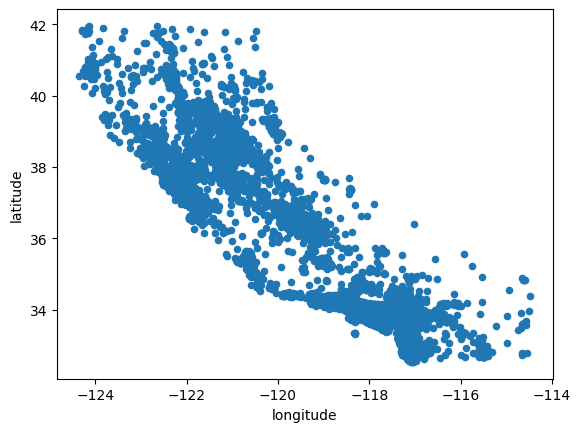

In [ ]:
#Let’s create a copy so you can play with it withoutharming the training set

housing = strat_train_set.copy()

#Since there is geographical information (latitude and longitude), it is a good idea to
#create a scatterplot of all districts to visualize the data


housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

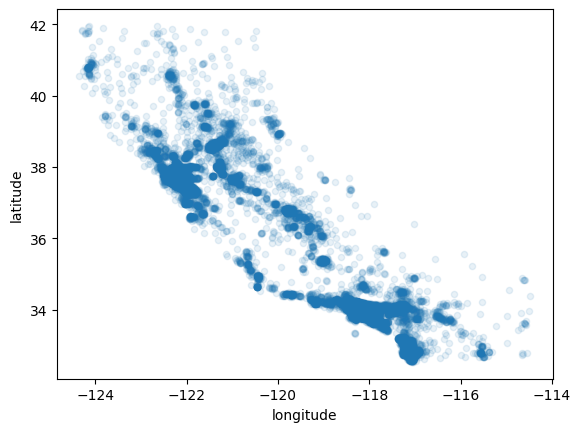

In [ ]:
#This looks like California all right, but other than that it is hard to see any particular
#pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
#where there is a high density of data points


#the high-density areas, namely the Bay Area and around Los Angeles and San Diego

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

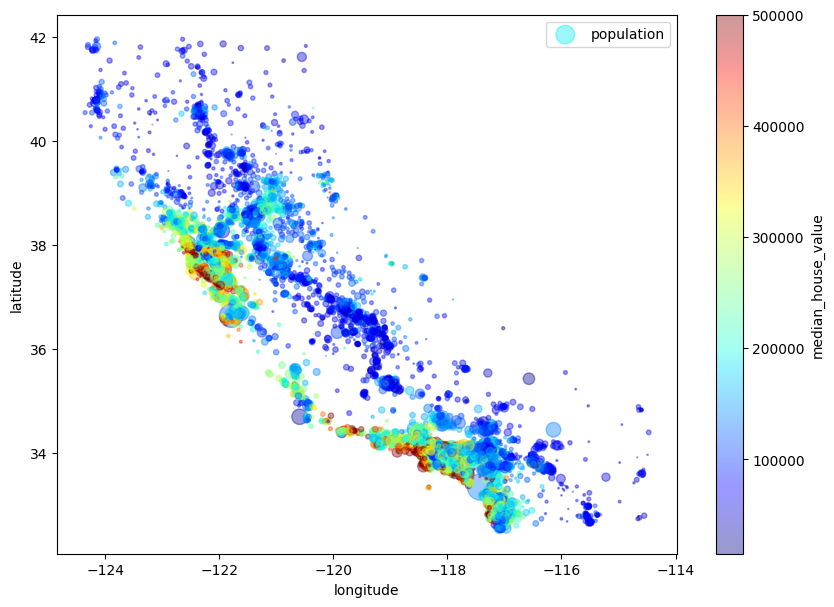

In [ ]:
#Now let’s look at the housing prices (Figure 2-13). The radius of each circle represents
#the district’s population (option s), and the color represents the price (option c). We
#will use a predefined color map (option cmap) called jet, which ranges from blue
#(low values) to red (high prices)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

#This image tells you that the housing prices are very much related to the location
#(e.g., close to the ocean) and to the population density, as you probably knew already


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,187800.0,<1H OCEAN
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,136600.0,<1H OCEAN
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,400000.0,NEAR BAY
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,106300.0,INLAND
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND


<Axes: xlabel='median_income', ylabel='median_house_value'>

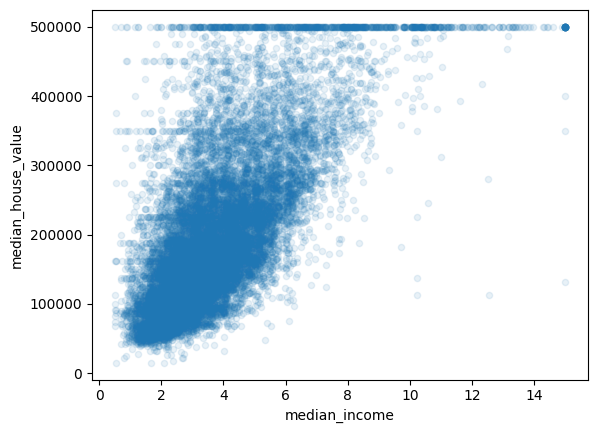

In [ ]:

#The most promising attribute to predict the median house value is the median
#income, so let’s zoom in on their correlation scatterplot

housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

#the correlation is indeed very strong


In [ ]:

#Attribute Combinations
#For example, the total number of rooms in a district is not very useful if you don’t know how many households there are.
#  What you really want is the number of rooms per household
#Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms.

#And the population per household also seems like an interesting attribute combination to look at

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

#The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms
#Apparently houses with a lower bedroom/room ratio tend to be more expensive
#The number of rooms per household is also more informative than the total number of rooms in a
#district—obviously the larger the houses, the more expensive they are.

<ipython-input-21-9881beb67164>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688988
rooms_per_household         0.157680
total_rooms                 0.137430
housing_median_age          0.107227
households                  0.069089
total_bedrooms              0.053455
population                 -0.023882
population_per_household   -0.026893
longitude                  -0.042943
latitude                   -0.145757
bedrooms_per_room          -0.255922
Name: median_house_value, dtype: float64

In [ ]:
#Prepare the Data for Machine Learning Algorithms
#separate the predictors and the labels since we don’t necessarily want to apply
#the same transformations to the predictors and the target values

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#Data Cleaning

# we can choose one of these options

housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

#OR

#using Sciket learn

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#median can only be computed on numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
imputer.statistics_

X = imputer.transform(housing_num)


#The result is a plain NumPy array containing the transformed features. If you want to
#put it back into a Pandas DataFrame, it’s simple

housing_tr = pd.DataFrame(X, columns=housing_num.columns)


In [ ]:
#Handling Text and Categorical Attributes

#Earlier we left out the categorical attribute ocean_proximity because it is a text
#attribute so we cannot compute its median:

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

# Most Machine Learning algorithms prefer to work with numbers anyway

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

#You can get the list of categories using the categories_ instance variable

ordinal_encoder.categories_


#One issue with this representation is that ML algorithms will assume that two nearby
#values are more similar than two distant values. This may be fine in some cases (e.g.,
#for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
#not the case for the ocean_proximity column (for example, categories 0 and 4 are
#clearly more similar than categories 0 and 1).

#common solution is
# create one binary attribute per category: one attribute equal to 1 when the category
#is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is
#“INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,<1H OCEAN
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,<1H OCEAN
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,NEAR BAY
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,INLAND
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,INLAND


In [ ]:
#Custom Transformers

#You will want your transformer to work seamlessly with Scikit-Learn functionalities
#(such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance),
#all you need is to create a class and implement three methods: fit()
#(returning self), transform(), and fit_transform()


from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-122.87, 38.48, 27.0, ..., '<1H OCEAN', 5.446153846153846,
        2.5622377622377623],
       [-118.34, 34.02, 49.0, ..., '<1H OCEAN', 4.136246786632391,
        2.303341902313625],
       [-122.42, 37.79, 52.0, ..., 'NEAR BAY', 3.219138755980861,
        2.0210526315789474],
       ...,
       [-121.98, 37.22, 46.0, ..., '<1H OCEAN', 5.664233576642336,
        2.093206064008984],
       [-118.08, 33.88, 26.0, ..., '<1H OCEAN', 5.48, 3.3854545454545453],
       [-118.18, 33.8, 30.0, ..., 'NEAR OCEAN', 3.9565846599131693,
        4.270622286541244]], dtype=object)

In [ ]:
#Feature Scaling

#Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales
#This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median
#incomes only range from 0 to 15.

# two ways
#1- min-max(normalization)) : values are shifted and rescaled so that they end up ranging from 0 to 1.
#We do this by subtracting the min value and dividing by the max minus the min.scaling and

# 2- standardization.:subtracts the mean value (so standardized
#values always have a zero mean), and then it divides by the standard deviation so that
#the resulting distribution has unit variance

#standardization is much less affected by outliers. For example, suppose a district
#had a median income equal to 100 (by mistake). Min-max scaling would then crush
#all the other values from 0–15 down to 0–0.15,





In [ ]:
#PIPELINES

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

#The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
#steps. All but the last estimator must be transformers (i.e., they must have a
#fit_transform() method).


#When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
#all transformers, passing the output of each call as the parameter to the next call, until
#it reaches the final estimator, for which it just calls the fit() method.

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)



In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels=housing_labels[:5]

In [ ]:
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("labels" , list(some_labels))
print("Predictions:", lin_reg.predict(some_data_prepared))

labels [187800.0, 136600.0, 400000.0, 106300.0, 43500.0]
Predictions: [227885.17864683 199641.86684096 250266.3411042  236655.89283764
  11125.78759882]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

68286.41923036716

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared,housing_labels, scoring='neg_mean_squared_error',cv=10)

In [ ]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69039.15590078, 72835.46069261, 70389.04113036, 69568.65767882,
       70946.82091442, 73004.47826371, 70179.42235806, 69851.32884499,
       72912.8726892 , 69930.87455591])

In [ ]:
def display_scores(scores):
  print("Scores: ",scores)
  print("mean: ",scores.mean())
  print("Standard Deviation: ", scores.std())


In [ ]:
display_scores(tree_rmse_scores)

Scores:  [69039.15590078 72835.46069261 70389.04113036 69568.65767882
 70946.82091442 73004.47826371 70179.42235806 69851.32884499
 72912.8726892  69930.87455591]
mean:  70865.81130288678
Standard Deviation:  1423.7779463778709


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared,housing_labels, scoring='neg_mean_squared_error',cv=10)

In [ ]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
display_scores(lin_rmse_scores)

Scores:  [65993.97246676 69010.24806374 71413.83112493 68742.95840851
 68937.97597951 66882.38169636 68302.97258028 66747.85112588
 69786.49966527 69063.19231501]
mean:  68488.18834262603
Standard Deviation:  1515.8560925367408


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)

In [ ]:
forest_mse= mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18768.221601232683

In [ ]:
forest_score=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [ ]:
forest_rmse=np.sqrt(-forest_mse)
display_scores(forest_rmse)


Scores:  nan
mean:  nan
Standard Deviation:  nan


<ipython-input-46-55fc7a1dbe79>:1: RuntimeWarning: invalid value encountered in sqrt
  forest_rmse=np.sqrt(-forest_mse)
